# Explaintory Data Analysis

Extracting Insights

In [1]:
# Importing libraries
# Numpy for array operations and also to do calculations
import numpy as np
# Pandas for load dataset and manipulation of tabular data
import pandas as pd
# For plotting 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
#from IPython.core.pylabtools import figsize
#from datasist.structdata import detect_outliers

# For importing dataset from url
import urllib.request
# To interact with the underlying Operating System
import os
# For numerical computation and ML modeling phase 
import tensorflow as tf
# to manipulate date and time
from datetime import datetime, timedelta

In [2]:
# Download dataset from repo raw file link is a must to be able to load the file
# &> /dev/null
!wget https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/data_train_cleaned.csv

--2023-06-08 06:31:39--  https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/data_train_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1709063 (1.6M) [text/plain]
Saving to: ‘data_train_cleaned.csv’

data_train_cleaned. 100%[===================>]   1.63M  --.-KB/s    in 0.01s   

2023-06-08 06:31:39 (148 MB/s) - ‘data_train_cleaned.csv’ saved [1709063/1709063]



In [3]:
df = pd.read_csv("data_train_cleaned.csv")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,routes_count,dep_date_time,trip_duration,arrival_date_time
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,2019-03-24 22:20:00,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662,2,2019-05-01 05:50:00,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,2,2019-06-09 09:25:00,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218,1,2019-05-12 18:05:00,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302,1,2019-03-01 16:50:00,0 days 04:45:00,2019-03-01 21:35:00


In [5]:
df.shape

(10459, 15)

In [6]:
df.describe()

,Price,routes_count
count,10459.000000,10459.000000
mean,9025.636007,0.801893
std,4623.778407,0.659856
min,1759.000000,0.000000
25%,5224.000000,0.000000
50%,8266.000000,1.000000
75%,12334.000000,1.000000
max,79512.000000,3.000000


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'routes_count', 'dep_date_time',
       'trip_duration', 'arrival_date_time'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10459 non-null  object
 1   Date_of_Journey    10459 non-null  object
 2   Source             10459 non-null  object
 3   Destination        10459 non-null  object
 4   Route              10459 non-null  object
 5   Dep_Time           10459 non-null  object
 6   Arrival_Time       10459 non-null  object
 7   Duration           10459 non-null  object
 8   Total_Stops        10459 non-null  object
 9   Additional_Info    10459 non-null  object
 10  Price              10459 non-null  int64 
 11  routes_count       10459 non-null  int64 
 12  dep_date_time      10459 non-null  object
 13  trip_duration      10459 non-null  object
 14  arrival_date_time  10459 non-null  object
dtypes: int64(2), object(13)
memory usage: 1.2+ MB


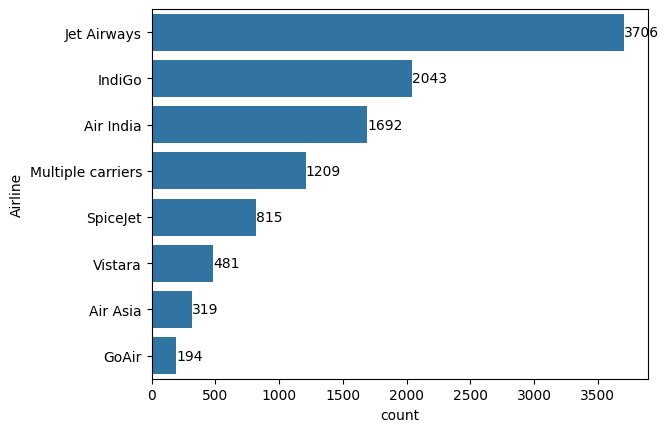

In [22]:
base_color = sns.color_palette()[0]

ax1 = sns.countplot(data=df, y="Airline", color = base_color, order=df['Airline'].value_counts().index)
ax1.bar_label(ax1.containers[0]);

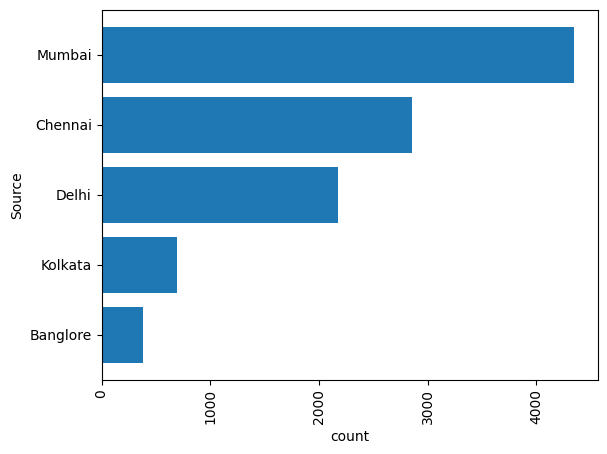

In [10]:
# Return the Series having unique values
x = df['Source'].unique()

# Return the Series having frequency count of each unique value
y = df['Source'].value_counts().sort_values()

plt.barh(x, y)

# Labeling the axes
plt.xlabel('count')
plt.ylabel('Source')
plt.xticks(rotation=90)
# Dsiplay the plot
plt.show();

In [11]:
df['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1692
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

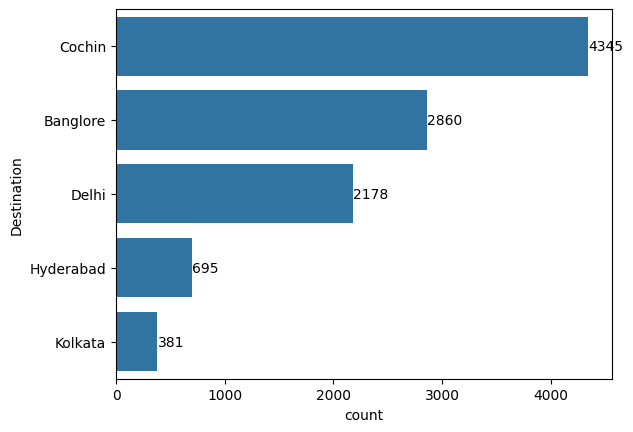

In [20]:
base_color = sns.color_palette()[0]

ax2 = sns.countplot(data=df, y="Destination", color = base_color, order=df['Destination'].value_counts().index)
ax2.bar_label(ax2.containers[0]);

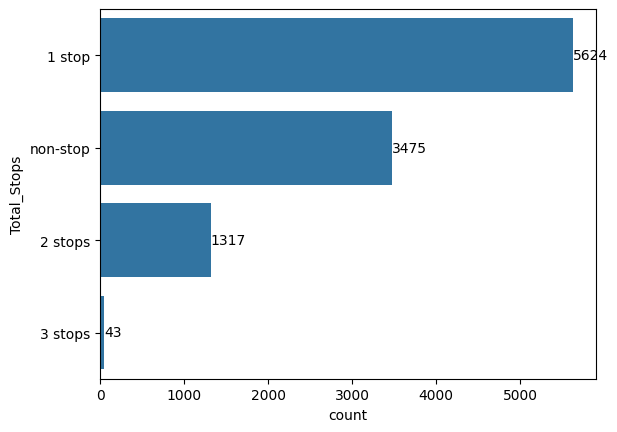

In [19]:
ax3 = sns.countplot(data=df, y="Total_Stops", color = base_color, order=df['Total_Stops'].value_counts().index)
ax3.bar_label(ax3.containers[0]);

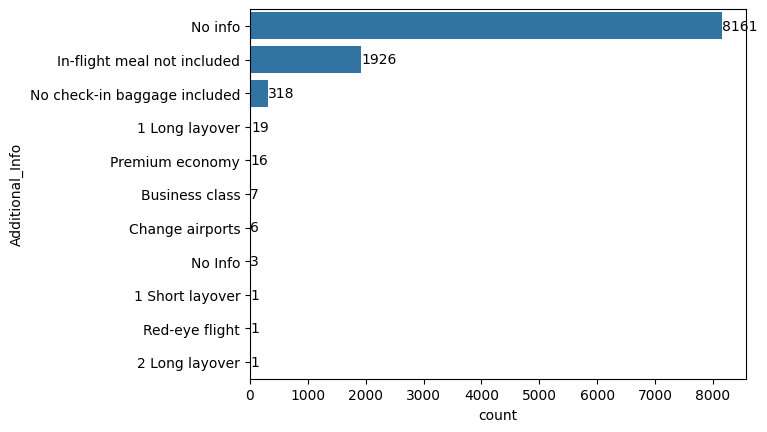

In [17]:
ax4 = sns.countplot(data=df, y="Additional_Info", color = base_color, order=df['Additional_Info'].value_counts().index)
ax4.bar_label(ax4.containers[0]);

In [15]:
df[df["Total_Stops"]=="3 stops"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,routes_count,dep_date_time,trip_duration,arrival_date_time
402,Air India,2019-06-15,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15:00,07:40 16 Jun,26h 25m,3 stops,No info,10493,3,2019-06-15 05:15:00,1 days 02:25:00,2019-06-16 07:40:00
918,Air India,2019-05-12,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,12:00:00,23:15 13 May,35h 15m,3 stops,No info,10991,3,2019-05-12 12:00:00,1 days 11:15:00,2019-05-13 23:15:00
1216,Air India,2019-06-27,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15:00,07:40 28 Jun,26h 25m,3 stops,No info,11543,3,2019-06-27 05:15:00,1 days 02:25:00,2019-06-28 07:40:00
1661,Air India,2019-03-01,Banglore,Delhi,BLR → CCU → BBI → HYD → DEL,05:50:00,12:15 02 Mar,30h 25m,3 stops,No info,12346,3,2019-03-01 05:50:00,1 days 06:25:00,2019-03-02 12:15:00
2160,Air India,2019-05-18,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15:00,19:15 19 May,38h,3 stops,No info,10703,3,2019-05-18 05:15:00,1 days 14:00:00,2019-05-19 19:15:00
2609,Air India,2019-03-12,Mumbai,Hyderabad,BOM → JDH → JAI → DEL → HYD,09:40:00,15:15 13 Mar,29h 35m,3 stops,No info,18293,3,2019-03-12 09:40:00,1 days 05:35:00,2019-03-13 15:15:00
2619,Multiple carriers,2019-03-06,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,11:35:00,21:00,9h 25m,3 stops,No info,21829,3,2019-03-06 11:35:00,0 days 09:25:00,2019-03-06 21:00:00
2701,Air India,2019-03-09,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,05:15:00,19:15 10 Mar,38h,3 stops,No info,15586,3,2019-03-09 05:15:00,1 days 14:00:00,2019-03-10 19:15:00
2797,Air India,2019-03-12,Banglore,Delhi,BLR → BOM → IDR → GWL → DEL,17:25:00,18:05 13 Mar,24h 40m,3 stops,No info,13387,3,2019-03-12 17:25:00,1 days 00:40:00,2019-03-13 18:05:00
2805,Air India,2019-05-24,Kolkata,Banglore,CCU → DEL → COK → TRV → BLR,10:00:00,10:30 25 May,24h 30m,3 stops,No info,13007,3,2019-05-24 10:00:00,1 days 00:30:00,2019-05-25 10:30:00
